In [13]:
import os
import pandas as pd
import csv
import matplotlib

In [10]:
inv_data = "Metro_invt_fs_uc_sfrcondo_sm_month.csv"
value_data = "Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
df_inv = pd.read_csv(inv_data)
df_value = pd.read_csv(value_data)
print(df_value.head())


   RegionID  SizeRank       RegionName RegionType StateName     2000-01-31  \
0    102001         0    United States    country       NaN  112815.884620   
1    394913         1     New York, NY        msa        NY  179016.866340   
2    753899         2  Los Angeles, CA        msa        CA  225229.750975   
3    394463         3      Chicago, IL        msa        IL  140260.935566   
4    394514         4       Dallas, TX        msa        TX  128720.957496   

      2000-02-29     2000-03-31     2000-04-30     2000-05-31  ...  \
0  113014.297752  113260.209562  113787.522445  114394.274429  ...   
1  179778.701216  180546.411097  182101.254842  183708.268404  ...   
2  226062.852930  227175.971878  229409.988288  231860.878234  ...   
3  140393.923049  140644.187618  141267.740940  142016.485458  ...   
4  128785.370590  128858.163118  129040.266249  129272.910526  ...   

      2022-06-30     2022-07-31     2022-08-31     2022-09-30     2022-10-31  \
0  334961.616261  337453.60086

In [30]:
df_inv_mi = df_inv[df_inv['StateName']=='MI']
df_inv_mi

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31
14,394532,14,"Detroit, MI",msa,MI,13656.0,14476.0,16040.0,17511.0,18923.0,...,13120.0,14606.0,15718.0,15984.0,15776.0,14851.0,13610.0,12249.0,11010.0,10486.0
52,394640,53,"Grand Rapids, MI",msa,MI,3192.0,3378.0,3773.0,4138.0,4506.0,...,2304.0,2617.0,2776.0,2711.0,2593.0,2361.0,2048.0,1756.0,1507.0,1450.0
106,394770,107,"Lansing, MI",msa,MI,2061.0,2140.0,2333.0,2508.0,2720.0,...,1240.0,1386.0,1483.0,1501.0,1502.0,1445.0,1335.0,1198.0,1063.0,1017.0
134,394596,135,"Flint, MI",msa,MI,1333.0,1338.0,1470.0,1592.0,1729.0,...,1192.0,1337.0,1483.0,1555.0,1567.0,1515.0,1409.0,1309.0,1186.0,1120.0
147,394332,148,"Ann Arbor, MI",msa,MI,896.0,1023.0,1208.0,1342.0,1440.0,...,857.0,900.0,948.0,948.0,913.0,845.0,735.0,624.0,544.0,557.0
188,394732,190,"Kalamazoo, MI",msa,MI,1248.0,1287.0,1383.0,1494.0,1624.0,...,771.0,854.0,899.0,900.0,889.0,839.0,754.0,645.0,539.0,486.0
230,395047,233,"Saginaw, MI",msa,MI,638.0,671.0,689.0,697.0,722.0,...,645.0,700.0,770.0,794.0,796.0,743.0,686.0,621.0,556.0,528.0
246,394896,250,"Muskegon, MI",msa,MI,609.0,605.0,639.0,690.0,772.0,...,406.0,454.0,487.0,490.0,477.0,460.0,434.0,397.0,353.0,328.0
268,394710,272,"Jackson, MI",msa,MI,663.0,673.0,714.0,766.0,816.0,...,572.0,612.0,641.0,592.0,541.0,478.0,448.0,400.0,345.0,323.0
278,394917,282,"Niles, MI",msa,MI,966.0,1020.0,1143.0,1298.0,1427.0,...,682.0,755.0,808.0,772.0,716.0,623.0,555.0,493.0,451.0,445.0


In [18]:
df_value_mi = df_value[df_value['StateName']=='MI']
df_value_mi.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
       ...
       '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31',
       '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31'],
      dtype='object', length=284)

In [20]:
df_unpivoted_value = df_value_mi.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Average Home Values')
df_unpivoted_value 


,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Home Values
0,394532,14,"Detroit, MI",msa,MI,2000-01-31,115050.871305
1,394640,53,"Grand Rapids, MI",msa,MI,2000-01-31,113364.724120
2,394770,107,"Lansing, MI",msa,MI,2000-01-31,92188.650154
3,394596,135,"Flint, MI",msa,MI,2000-01-31,72598.552299
4,394332,148,"Ann Arbor, MI",msa,MI,2000-01-31,171721.256524
...,...,...,...,...,...,...,...
8644,395069,738,"Sault Ste. Marie, MI",msa,MI,2023-03-31,143609.496713
8645,394573,742,"Escanaba, MI",msa,MI,2023-03-31,132900.793726
8646,394708,818,"Iron Mountain, MI",msa,MI,2023-03-31,129517.096198
8647,753901,822,"Ludington, MI",msa,MI,2023-03-31,195821.864945


In [31]:
df_unpivoted_value['Date']=pd.to_datetime(df_unpivoted_value['Date'])

In [32]:
df_unpivoted_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8649 entries, 0 to 8648
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   RegionID             8649 non-null   int64         
 1   SizeRank             8649 non-null   int64         
 2   RegionName           8649 non-null   object        
 3   RegionType           8649 non-null   object        
 4   StateName            8649 non-null   object        
 5   Date                 8649 non-null   datetime64[ns]
 6   Average Home Values  7655 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 473.1+ KB


In [36]:
df_post_covid_value = df_unpivoted_value[df_unpivoted_value['Date'].dt.year>=2019]
df_post_covid_value

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Home Values
7068,394532,14,"Detroit, MI",msa,MI,2019-01-31,165442.310748
7069,394640,53,"Grand Rapids, MI",msa,MI,2019-01-31,203537.680056
7070,394770,107,"Lansing, MI",msa,MI,2019-01-31,151170.210309
7071,394596,135,"Flint, MI",msa,MI,2019-01-31,104304.687540
7072,394332,148,"Ann Arbor, MI",msa,MI,2019-01-31,286036.901272
...,...,...,...,...,...,...,...
8644,395069,738,"Sault Ste. Marie, MI",msa,MI,2023-03-31,143609.496713
8645,394573,742,"Escanaba, MI",msa,MI,2023-03-31,132900.793726
8646,394708,818,"Iron Mountain, MI",msa,MI,2023-03-31,129517.096198
8647,753901,822,"Ludington, MI",msa,MI,2023-03-31,195821.864945


In [34]:
df_unpivoted_inv = df_inv_mi.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Total Inventory')
df_unpivoted_inv


,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Total Inventory
0,394532,14,"Detroit, MI",msa,MI,2018-03-31,13656.0
1,394640,53,"Grand Rapids, MI",msa,MI,2018-03-31,3192.0
2,394770,107,"Lansing, MI",msa,MI,2018-03-31,2061.0
3,394596,135,"Flint, MI",msa,MI,2018-03-31,1333.0
4,394332,148,"Ann Arbor, MI",msa,MI,2018-03-31,896.0
...,...,...,...,...,...,...,...
1886,395069,738,"Sault Ste. Marie, MI",msa,MI,2023-03-31,106.0
1887,394573,742,"Escanaba, MI",msa,MI,2023-03-31,88.0
1888,394708,818,"Iron Mountain, MI",msa,MI,2023-03-31,134.0
1889,753901,822,"Ludington, MI",msa,MI,2023-03-31,203.0


In [37]:
df_unpivoted_inv['Date']=pd.to_datetime(df_unpivoted_inv['Date'])

In [38]:
df_post_covid_inv = df_unpivoted_inv[df_unpivoted_inv['Date'].dt.year>=2019]
df_post_covid_inv

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Total Inventory
310,394532,14,"Detroit, MI",msa,MI,2019-01-31,16986.0
311,394640,53,"Grand Rapids, MI",msa,MI,2019-01-31,3497.0
312,394770,107,"Lansing, MI",msa,MI,2019-01-31,2216.0
313,394596,135,"Flint, MI",msa,MI,2019-01-31,1598.0
314,394332,148,"Ann Arbor, MI",msa,MI,2019-01-31,1093.0
...,...,...,...,...,...,...,...
1886,395069,738,"Sault Ste. Marie, MI",msa,MI,2023-03-31,106.0
1887,394573,742,"Escanaba, MI",msa,MI,2023-03-31,88.0
1888,394708,818,"Iron Mountain, MI",msa,MI,2023-03-31,134.0
1889,753901,822,"Ludington, MI",msa,MI,2023-03-31,203.0


In [39]:
df_post_covid_inv_detroit = df_post_covid_inv[df_post_covid_inv['RegionName']=="Detroit, MI"]
df_post_covid_inv_detroit

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Total Inventory
310,394532,14,"Detroit, MI",msa,MI,2019-01-31,16986.0
341,394532,14,"Detroit, MI",msa,MI,2019-02-28,15770.0
372,394532,14,"Detroit, MI",msa,MI,2019-03-31,15743.0
403,394532,14,"Detroit, MI",msa,MI,2019-04-30,16255.0
434,394532,14,"Detroit, MI",msa,MI,2019-05-31,17733.0
465,394532,14,"Detroit, MI",msa,MI,2019-06-30,19482.0
496,394532,14,"Detroit, MI",msa,MI,2019-07-31,20989.0
527,394532,14,"Detroit, MI",msa,MI,2019-08-31,22033.0
558,394532,14,"Detroit, MI",msa,MI,2019-09-30,22327.0
589,394532,14,"Detroit, MI",msa,MI,2019-10-31,22236.0


<AxesSubplot:xlabel='Date'>

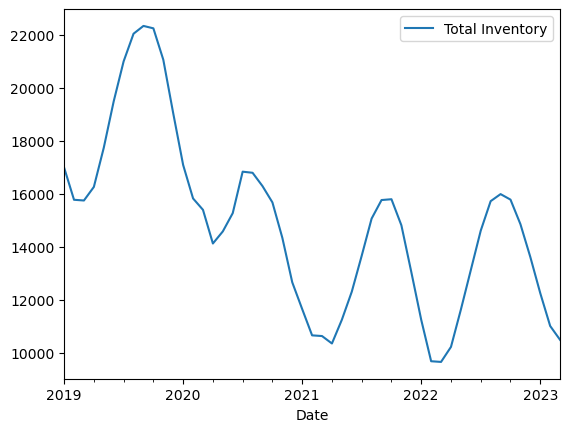

In [40]:
df_post_covid_inv_detroit.plot(x='Date', y='Total Inventory', kind='line')

In [41]:
df_post_covid_value_detroit = df_post_covid_value[df_post_covid_value['RegionName'] == "Detroit, MI"]
df_post_covid_value_detroit


,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Home Values
7068,394532,14,"Detroit, MI",msa,MI,2019-01-31,165442.310748
7099,394532,14,"Detroit, MI",msa,MI,2019-02-28,167089.548924
7130,394532,14,"Detroit, MI",msa,MI,2019-03-31,168954.334740
7161,394532,14,"Detroit, MI",msa,MI,2019-04-30,170493.405590
7192,394532,14,"Detroit, MI",msa,MI,2019-05-31,171705.992776
7223,394532,14,"Detroit, MI",msa,MI,2019-06-30,172591.786828
7254,394532,14,"Detroit, MI",msa,MI,2019-07-31,173041.716589
7285,394532,14,"Detroit, MI",msa,MI,2019-08-31,173107.188149
7316,394532,14,"Detroit, MI",msa,MI,2019-09-30,172896.060824
7347,394532,14,"Detroit, MI",msa,MI,2019-10-31,172973.615218


<AxesSubplot:xlabel='Date'>

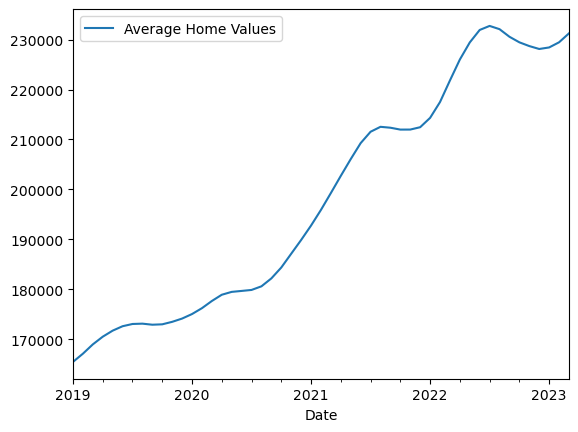

In [43]:
df_post_covid_value_detroit.plot(x='Date', y='Average Home Values', kind='line')
